# Credit_card_approval_prediction
 

# Problem Statment


**Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given.**

1.Application

For a credit card, the customers fill-up the form - online or a physical. The application information is used for assessing the creditworthiness of the customer. In addition to the application information, the Credit Bureau Score e.g. FICO Score in the US, CIBIL Score in India, and other internal information about the applicants are used for the decision.

Also, gradually the banks are considering a lot of external data to improve the quality of credit decisions.

Now, we will read and explore the application sample data file provided.

Credit Status

Once a credit card is issued, the customer uses it for shopping items of its use, a statement is generated to make a payment toward the dues by due date and the customer makes payment. This is a typical credit card cycle.

If a customer is not able to make a payment for the minimum due amount, the customer is considered past due for that month. If the non-payment is continued for a period, the customer is considered as a defaulter and the due amount is written off & becomes bad debt. Of course, there is a lot of effort and steps the bank does to recover the due amount and this falls under the collection process.

With the modeling process, the aim to learn about the customers who were not able to pay back the dues and not to approve applications of the customers who look similar to these. Of course, we do not know the applications that were rejected and how many of those were actually good customers. This is not in the scope of this blog.

For this exercise, the credit status file is given. In this file, the status value is given for each of the applications post approved

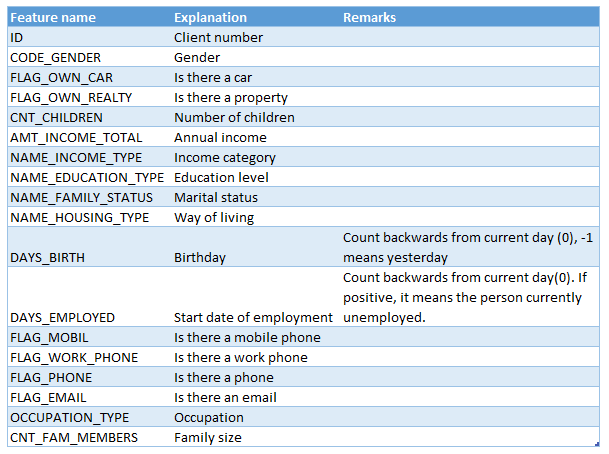

# Importing Libraries 

In [234]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data using two data sources


In [235]:
#load the application record  dtaset
df_app = pd.read_csv('/content/application_record.csv')
df_app.head(3)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0          Working               Higher education   
1          427500.0          Working               Higher education   
2          112500.0          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0     Civil marriage   Rented apartment      -12005          -4542   
1     Civil marriage   Rented apartment      -12005          -4542   
2            Married  House / apartment      -21474          -1134   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0

In [236]:
#load the credict record datset
df_cred = pd.read_csv('/content/credit_record.csv')
df_cred.head(3)

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0

In [237]:
# rows in Application Data
len(df_app)

438557

In [238]:
# rows in credit status
len(df_cred)

1048575

In [239]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [240]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# Summary Statistics


Summary statistics for each of the numeric features gives insights around the feature value distribution.

In [241]:
df_app.describe()

ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000         1.0         0.000000       0.000000   
50%     -1467.000000         1.0         0.000000       0.000000   
75%      -371.000000         1.0         0.000000       1.000000   
max    365243.000000         1.0         1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  
count  438557.000000    438557.000000  
mean        0.108207         2.194465  
std         0.310642         0.897207  
min         0.000000         1.000000  
25%         0.000000         2.000000  
50%         0.000000         2.000000  
75%         0.000000         3.000000  
max         1.000000        20.000000


Key observations from the summary statistics are:


FLAG_MOBIL : Min and Max values are same, so may not be of any use.
CNT_FAM_MEMBERS: Max value is 20 and 75th percentile is 3, so we may want to check for outliers.


Some of the flag variables have 0 value for 75th percentile, so we may check the count/percentage for 1 & 0 values for these.

In [242]:
df_cred.describe()

ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00

In [243]:
df_cred.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [244]:
out_df = df_cred.groupby(['MONTHS_BALANCE']).agg(
    # Counts
    counts=('MONTHS_BALANCE', lambda x: len(x) ),
    # Percent
    percent = ('MONTHS_BALANCE', lambda x: (len(x)*100/ len(df_cred['MONTHS_BALANCE'])))
    ).reset_index()
out_df

MONTHS_BALANCE  counts   percent
0              -60     415  0.039578
1              -59     820  0.078201
2              -58    1255  0.119686
3              -57    1649  0.157261
4              -56    2109  0.201130
..             ...     ...       ...
56              -4   33365  3.181937
57              -3   33854  3.228572
58              -2   34209  3.262428
59              -1   34436  3.284076
60               0   33856  3.228763

[61 rows x 3 columns]

In [245]:
pd.pivot_table(out_df,index=['MONTHS_BALANCE'])

counts   percent
MONTHS_BALANCE                  
-60                415  0.039578
-59                820  0.078201
-58               1255  0.119686
-57               1649  0.157261
-56               2109  0.201130
...                ...       ...
-4               33365  3.181937
-3               33854  3.228572
-2               34209  3.262428
-1               34436  3.284076
 0               33856  3.228763

[61 rows x 2 columns]

In [246]:
df_app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

438510

In [247]:
df_cred['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

45985

In [248]:
df_app.isnull().sum() # checking for null values. Seems like occupation_type has many

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [249]:
df_cred.isnull().sum() # checking for null values. All good here!

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [250]:
df_app = df_app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [251]:
# Merge both application_record and credit record on ID

final_df = df_app.merge(df_cred, on=['ID'],how='inner')
final_df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0               0   
1           0           0             NaN              2.0              -1   
2           0           0             NaN              2.0              -2   
3           0           0             NaN              2.0              -3   
4           0           0             NaN              2.0              -4   

  STATUS  
0      C  
1      C  
2      C  
3      C  
4      C

In [252]:
final_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [253]:
final_df.shape

(777715, 20)

In [254]:
# drop null values, axis=0
final_df.dropna(inplace=True)
final_df.shape

(537667, 20)

### so we change the credit card approval status column by seeing given data description
##### 1,2,3,4 and 5 are bad clients, X and C are good clients and 0 consider as neutral (not bad and not good) so let's take 0 also as good client.

In [255]:
# replacing the status values as good -> 1, bad -> 0

final_df.STATUS = final_df.STATUS.map({"X":1,"C":1, "0":1, "1":0, "2":0, "3":0, "4":0, "5":0})
final_df.sample(5)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
159299  5036539           F            N               N             0   
270934  5053434           M            Y               N             1   
293049  5054719           M            Y               Y             2   
404867  5079127           M            N               Y             0   
45217   5021522           F            N               N             0   

        AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
159299          157500.0  Commercial associate              Incomplete higher   
270934          247500.0               Working  Secondary / secondary special   
293049           81000.0               Working               Higher education   
404867          270000.0               Working               Higher education   
45217           202500.0               Working               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
159299               Married  House / apartment      -20405          -5045   
270934        Civil marriage  House / apartment      -14750            -89   
293049  Single / not married  House / apartment      -11882           -181   
404867               Married  House / apartment      -11944          -2262   
45217                Married  House / apartment      -19271          -4839   

        FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
159299           1                1           1           0   
270934           1                0           0           0   
293049           1                0           0           0   
404867           1                0           0           0   
45217            1                0           0           1   

              OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
159299  High skill tech staff              2.0             -10       1  
270934                Drivers              3.0             -28       1  
293049     Low-skill Laborers              3.0             -15       1  
404867               Laborers              2.0              -3       1  
45217              Core staff              2.0             -50       1

In [256]:
final_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [257]:
final_df.head(4)

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806           M            Y               Y             0   
32  5008806           M            Y               Y             0   
33  5008806           M            Y               Y             0   
34  5008806           M            Y               Y             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
31          112500.0          Working  Secondary / secondary special   
32          112500.0          Working  Secondary / secondary special   
33          112500.0          Working  Secondary / secondary special   
34          112500.0          Working  Secondary / secondary special   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
31            Married  House / apartment      -21474          -1134   
32            Married  House / apartment      -21474          -1134   
33            Married  House / apartment      -21474          -1134   
34            Married  House / apartment      -21474          -1134   

    FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
31           1                0           0           0  Security staff   
32           1                0           0           0  Security staff   
33           1                0           0           0  Security staff   
34           1                0           0           0  Security staff   

    CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
31              2.0               0       1  
32              2.0              -1       1  
33              2.0              -2       1  
34              2.0              -3       1

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
# replace M & F as 0 & 1 
final_df['CODE_GENDER'].replace('M',0,inplace=True) #male -> 0
final_df['CODE_GENDER'].replace('F',1,inplace=True)#female -> 1
final_df['FLAG_OWN_CAR'].replace('Y',0,inplace=True)
final_df['FLAG_OWN_CAR'].replace('N',1,inplace=True)
final_df['FLAG_OWN_REALTY'].replace('Y',0,inplace=True)
final_df['FLAG_OWN_REALTY'].replace('N',1,inplace=True)
final_df.head(4)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   
34  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
31          112500.0          Working  Secondary / secondary special   
32          112500.0          Working  Secondary / secondary special   
33          112500.0          Working  Secondary / secondary special   
34          112500.0          Working  Secondary / secondary special   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
31            Married  House / apartment      -21474          -1134   
32            Married  House / apartment      -21474          -1134   
33            Married  House / apartment      -21474          -1134   
34            Married  House / apartment      -21474          -1134   

    FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
31           1                0           0           0  Security staff   
32           1                0           0           0  Security staff   
33           1                0           0           0  Security staff   
34           1                0           0           0  Security staff   

    CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
31              2.0               0       1  
32              2.0              -1       1  
33              2.0              -2       1  
34              2.0              -3       1

In [260]:
numerical_cols = final_df.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']


In [261]:
# assuming 'df' is the pandas DataFrame containing the data
numerical_cols = ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS']

unique_counts = final_df[numerical_cols].nunique()
print(unique_counts)

ID                  25134
CODE_GENDER             2
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
CNT_CHILDREN            9
AMT_INCOME_TOTAL      195
DAYS_BIRTH           5206
DAYS_EMPLOYED        3299
FLAG_MOBIL              1
FLAG_WORK_PHONE         2
FLAG_PHONE              2
FLAG_EMAIL              2
CNT_FAM_MEMBERS        10
MONTHS_BALANCE         61
STATUS                  2
dtype: int64


ID                      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
CNT_CHILDREN         8030
AMT_INCOME_TOTAL     6960
DAYS_BIRTH              0
DAYS_EMPLOYED       10348
FLAG_MOBIL              0
FLAG_WORK_PHONE         0
FLAG_PHONE              0
FLAG_EMAIL              0
CNT_FAM_MEMBERS      1402
MONTHS_BALANCE          0
STATUS               8385
dtype: int64


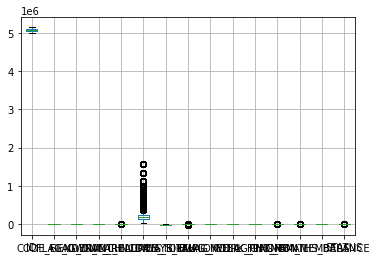

In [262]:
# Create a box plot for each numeric column
final_df.boxplot(column=list(final_df.select_dtypes(include='number').columns))

# Calculate z-scores for all numerical variables
z_scores = final_df.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

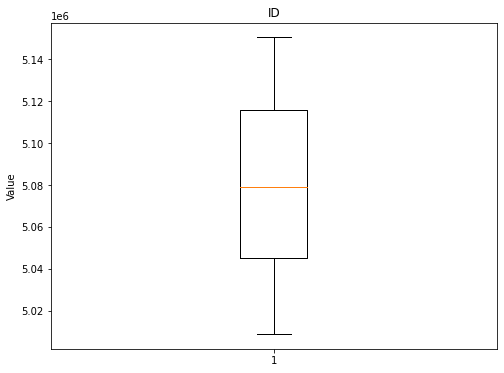

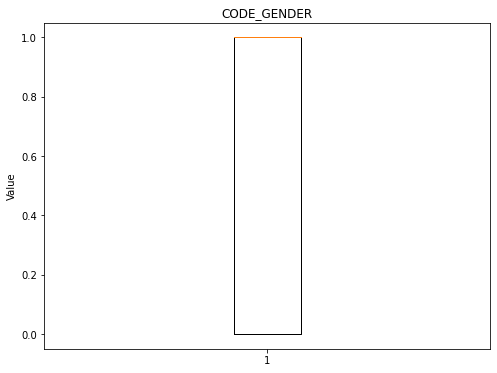

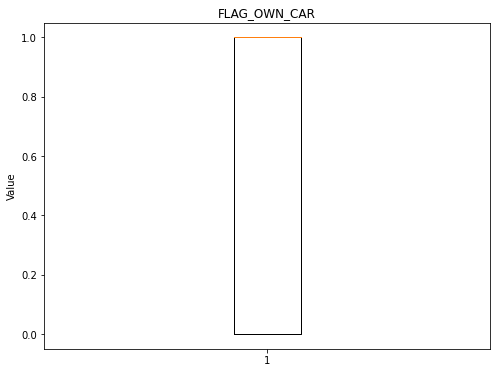

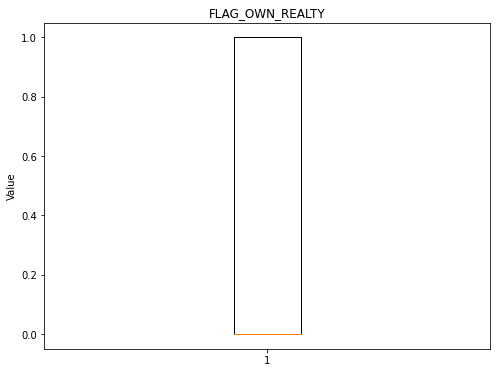

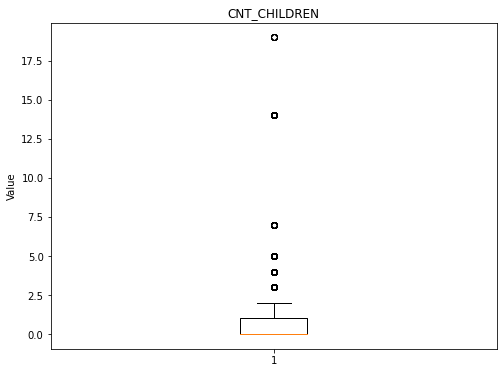

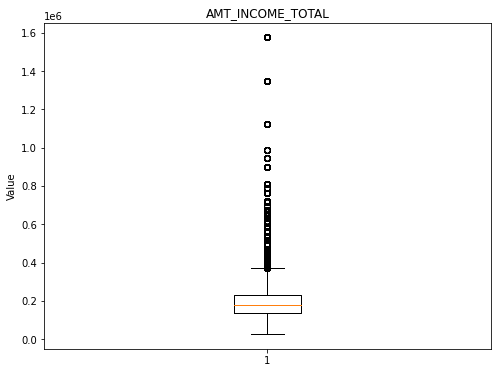

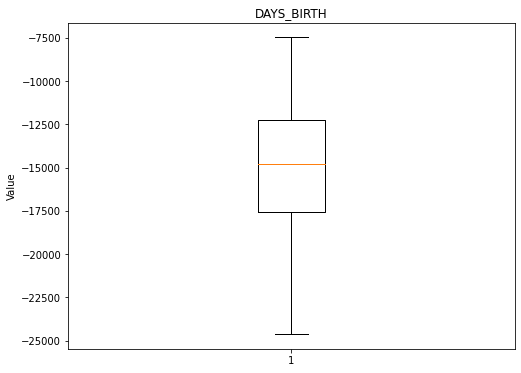

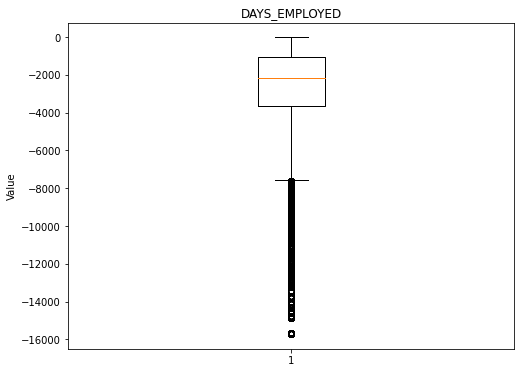

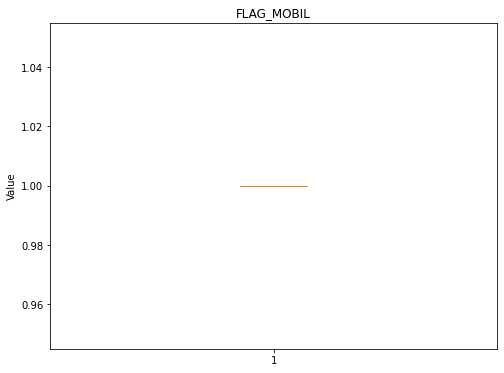

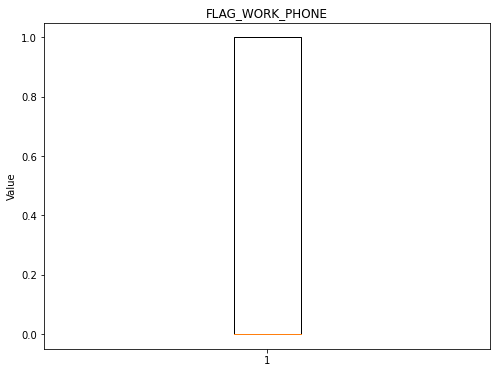

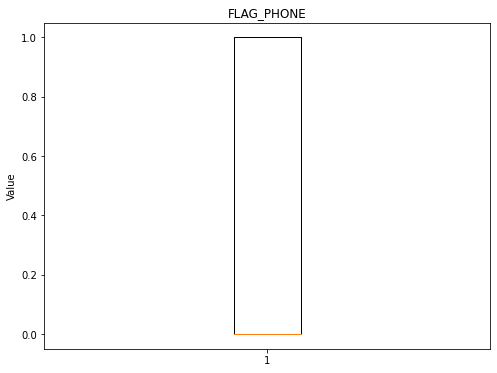

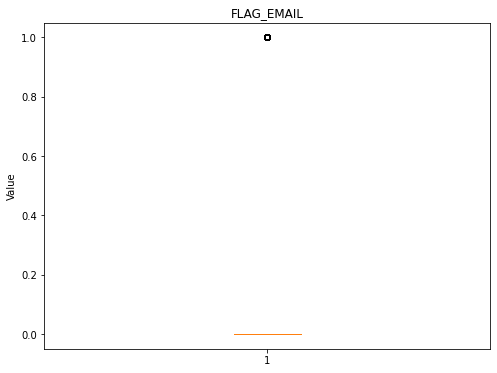

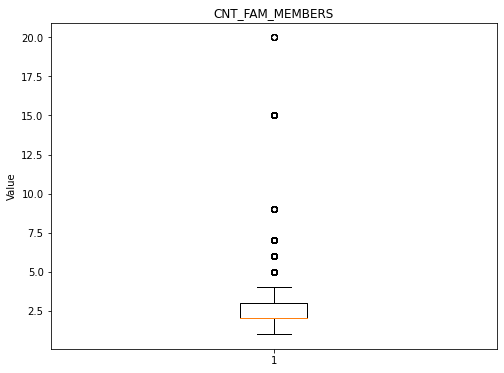

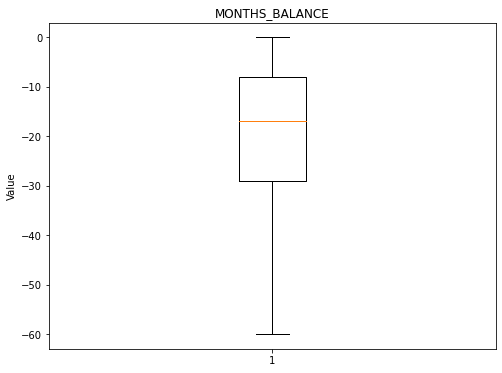

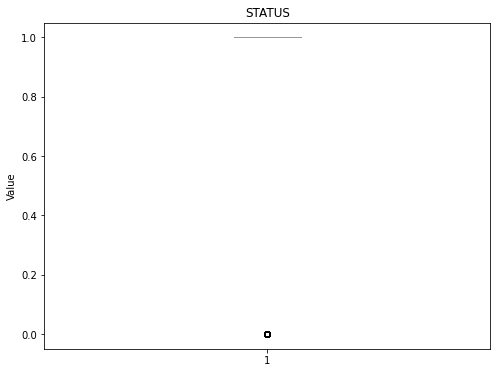

In [263]:
# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(final_df[col])
    plt.title(col)
    plt.ylabel('Value')
    plt.show()

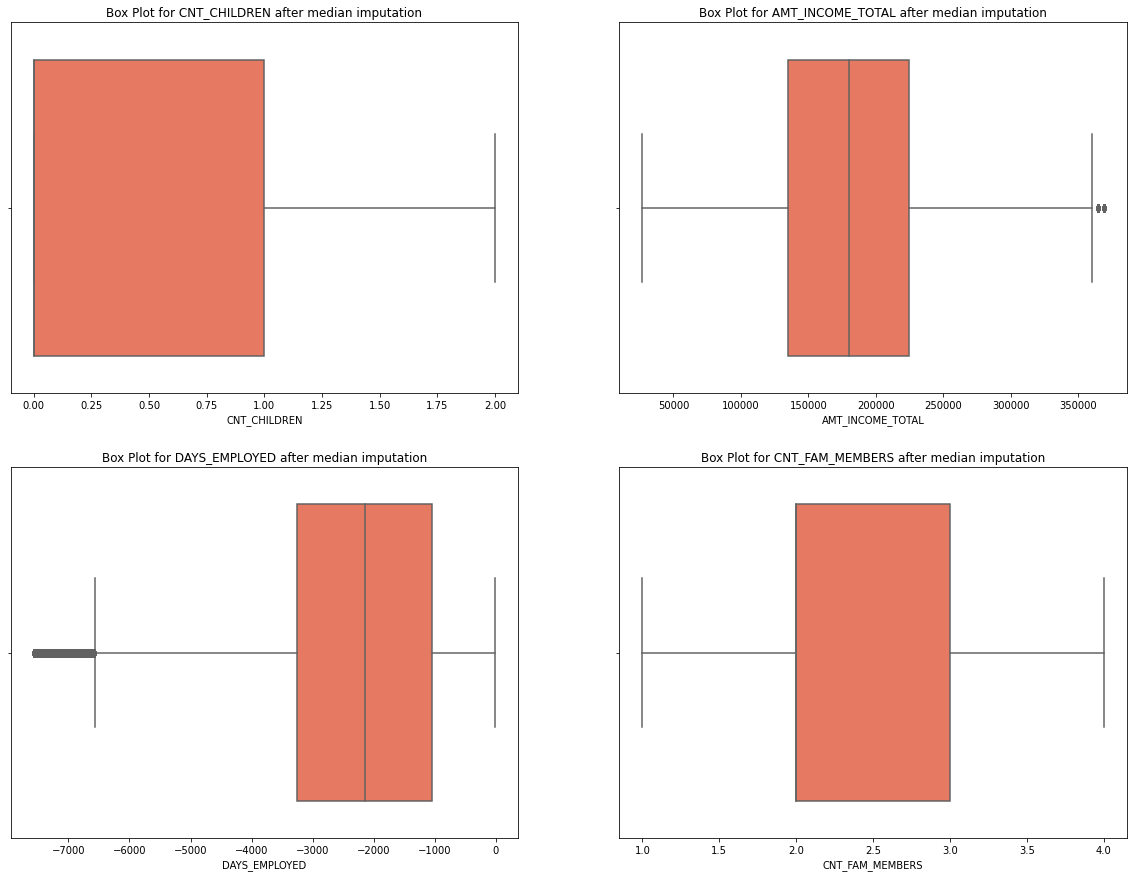

In [264]:
# Define a list of columns to replace outliers
cols_to_replace = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

# Define a function to replace outliers with the median value
def replace_outliers(final_df, col):
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    med = np.median(final_df[col])
    for i in final_df[col]:
        if i > upper_tail or i < lower_tail:
            final_df[col] = final_df[col].replace(i, med)
    return final_df

# Replace outliers for each column in the list
for col in cols_to_replace:
    final_df = replace_outliers(final_df, col)

# Plot the boxplots for each column after outlier treatment
fig, axs = plt.subplots(2,2, figsize=(20,15))
axs = axs.ravel()
for i, col in enumerate(cols_to_replace):
    sns.boxplot(x=col, data=final_df, palette="Reds_r", ax=axs[i])
    axs[i].set_title("Box Plot for "+col+" after median imputation")
plt.show()


<Axes: xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

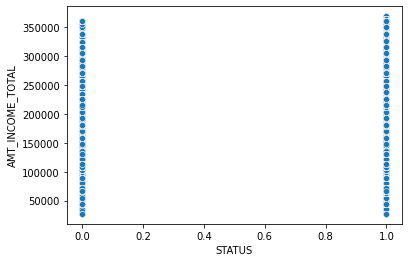

In [265]:
sns.scatterplot(x='STATUS', y='AMT_INCOME_TOTAL', data=final_df)


<Axes: >

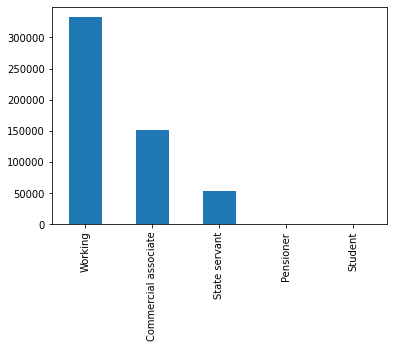

In [266]:
final_df.NAME_INCOME_TYPE.value_counts().plot(kind='bar')

In [267]:
def income_tans(df,col):
    result_col = []
    for i in df[col]:
        if i == 'Working':
            result_col.append('Working')
        elif i == 'Commercial associate':
            result_col.append('Commercial associate')
        elif i == 'State servant':
            result_col.append('State servant')
        else:
            result_col.append('others')
    df[col] = result_col
    return df


income_tans(final_df,'NAME_INCOME_TYPE')
final_df.NAME_INCOME_TYPE.value_counts()

Working                 332868
Commercial associate    151412
State servant            52733
others                     654
Name: NAME_INCOME_TYPE, dtype: int64

In [268]:
final_df.head(3)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
31          112500.0          Working  Secondary / secondary special   
32          112500.0          Working  Secondary / secondary special   
33          112500.0          Working  Secondary / secondary special   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
31            Married  House / apartment      -21474          -1134   
32            Married  House / apartment      -21474          -1134   
33            Married  House / apartment      -21474          -1134   

    FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
31           1                0           0           0  Security staff   
32           1                0           0           0  Security staff   
33           1                0           0           0  Security staff   

    CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
31              2.0               0       1  
32              2.0              -1       1  
33              2.0              -2       1

In [269]:
final_df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    358317
Higher education                 153770
Incomplete higher                 20590
Lower secondary                    4556
Academic degree                     434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [270]:
final_df.NAME_EDUCATION_TYPE = final_df.NAME_EDUCATION_TYPE.str.split('/').str[0]
final_df.NAME_EDUCATION_TYPE.value_counts()

Secondary            358317
Higher education     153770
Incomplete higher     20590
Lower secondary        4556
Academic degree         434
Name: NAME_EDUCATION_TYPE, dtype: int64

In [271]:
final_df.NAME_FAMILY_STATUS.value_counts()

Married                 384003
Single / not married     65944
Civil marriage           44083
Separated                31394
Widow                    12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [272]:
final_df.NAME_FAMILY_STATUS = final_df.NAME_FAMILY_STATUS.str.split('/').str[0]
final_df.NAME_FAMILY_STATUS.value_counts()

Married           384003
Single             65944
Civil marriage     44083
Separated          31394
Widow              12243
Name: NAME_FAMILY_STATUS, dtype: int64

In [273]:
final_df.head(3)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31          112500.0          Working          Secondary             Married   
32          112500.0          Working          Secondary             Married   
33          112500.0          Working          Secondary             Married   

    NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
31  House / apartment      -21474          -1134           1                0   
32  House / apartment      -21474          -1134           1                0   
33  House / apartment      -21474          -1134           1                0   

    FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
31           0           0  Security staff              2.0               0   
32           0           0  Security staff              2.0              -1   
33           0           0  Security staff              2.0              -2   

    STATUS  
31       1  
32       1  
33       1

In [274]:
final_df.NAME_HOUSING_TYPE.value_counts()

House / apartment      474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [275]:
final_df.NAME_HOUSING_TYPE = final_df.NAME_HOUSING_TYPE.str.split('/').str[0]
final_df.NAME_HOUSING_TYPE.value_counts()

House                  474177
With parents            29351
Municipal apartment     18023
Rented apartment         8561
Office apartment         4159
Co-op apartment          3396
Name: NAME_HOUSING_TYPE, dtype: int64

In [276]:
final_df.head(3)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31          112500.0          Working          Secondary             Married   
32          112500.0          Working          Secondary             Married   
33          112500.0          Working          Secondary             Married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
31            House       -21474          -1134           1                0   
32            House       -21474          -1134           1                0   
33            House       -21474          -1134           1                0   

    FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
31           0           0  Security staff              2.0               0   
32           0           0  Security staff              2.0              -1   
33           0           0  Security staff              2.0              -2   

    STATUS  
31       1  
32       1  
33       1

In [277]:
final_df.AMT_INCOME_TOTAL = final_df.AMT_INCOME_TOTAL/1000
final_df.AMT_INCOME_TOTAL = final_df.AMT_INCOME_TOTAL.astype('int')
final_df.head(3)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31               112          Working          Secondary             Married   
32               112          Working          Secondary             Married   
33               112          Working          Secondary             Married   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
31            House       -21474          -1134           1                0   
32            House       -21474          -1134           1                0   
33            House       -21474          -1134           1                0   

    FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
31           0           0  Security staff              2.0               0   
32           0           0  Security staff              2.0              -1   
33           0           0  Security staff              2.0              -2   

    STATUS  
31       1  
32       1  
33       1

In [278]:
final_df['Age']=-(final_df['DAYS_BIRTH'])//365

final_df['employee_from_years']=-(final_df['DAYS_EMPLOYED'])//365

final_df.drop(columns=('DAYS_BIRTH'), inplace=True)

final_df.drop(columns=('DAYS_EMPLOYED'), inplace=True)
final_df.head(4)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   
34  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31               112          Working          Secondary             Married   
32               112          Working          Secondary             Married   
33               112          Working          Secondary             Married   
34               112          Working          Secondary             Married   

   NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
31            House            1                0           0           0   
32            House            1                0           0           0   
33            House            1                0           0           0   
34            House            1                0           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  Age  \
31  Security staff              2.0               0       1   58   
32  Security staff              2.0              -1       1   58   
33  Security staff              2.0              -2       1   58   
34  Security staff              2.0              -3       1   58   

    employee_from_years  
31                    3  
32                    3  
33                    3  
34                    3

In [279]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537667 entries, 31 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  int64  
 2   FLAG_OWN_CAR         537667 non-null  int64  
 3   FLAG_OWN_REALTY      537667 non-null  int64  
 4   CNT_CHILDREN         537667 non-null  int64  
 5   AMT_INCOME_TOTAL     537667 non-null  int64  
 6   NAME_INCOME_TYPE     537667 non-null  object 
 7   NAME_EDUCATION_TYPE  537667 non-null  object 
 8   NAME_FAMILY_STATUS   537667 non-null  object 
 9   NAME_HOUSING_TYPE    537667 non-null  object 
 10  FLAG_MOBIL           537667 non-null  int64  
 11  FLAG_WORK_PHONE      537667 non-null  int64  
 12  FLAG_PHONE           537667 non-null  int64  
 13  FLAG_EMAIL           537667 non-null  int64  
 14  OCCUPATION_TYPE      537667 non-null  object 
 15  CNT_FAM_MEMBERS 

Let's drop some column(FE)

In [280]:
final_df.head(4)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   
34  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31               112          Working          Secondary             Married   
32               112          Working          Secondary             Married   
33               112          Working          Secondary             Married   
34               112          Working          Secondary             Married   

   NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
31            House            1                0           0           0   
32            House            1                0           0           0   
33            House            1                0           0           0   
34            House            1                0           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  Age  \
31  Security staff              2.0               0       1   58   
32  Security staff              2.0              -1       1   58   
33  Security staff              2.0              -2       1   58   
34  Security staff              2.0              -3       1   58   

    employee_from_years  
31                    3  
32                    3  
33                    3  
34                    3

In [281]:
final_df.head(4)

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
31  5008806            0             0                0             0   
32  5008806            0             0                0             0   
33  5008806            0             0                0             0   
34  5008806            0             0                0             0   

    AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
31               112          Working          Secondary             Married   
32               112          Working          Secondary             Married   
33               112          Working          Secondary             Married   
34               112          Working          Secondary             Married   

   NAME_HOUSING_TYPE  FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
31            House            1                0           0           0   
32            House            1                0           0           0   
33            House            1                0           0           0   
34            House            1                0           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  Age  \
31  Security staff              2.0               0       1   58   
32  Security staff              2.0              -1       1   58   
33  Security staff              2.0              -2       1   58   
34  Security staff              2.0              -3       1   58   

    employee_from_years  
31                    3  
32                    3  
33                    3  
34                    3

In [282]:
final_df.drop(columns=['ID','CNT_CHILDREN','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_EMAIL'], inplace=True)
final_df.sample(10)

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  \
706609            0             1                0               202   
393749            1             1                1               135   
337869            1             0                0               135   
654636            1             0                1                67   
447431            0             1                0               180   
267253            1             1                0               315   
407402            1             1                0               180   
521675            1             1                1               144   
499210            1             1                1               157   
324532            1             1                0               112   

            NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
706609               Working          Secondary             Married   
393749  Commercial associate    Higher education            Married   
337869               Working    Higher education            Married   
654636         State servant    Higher education            Married   
447431               Working          Secondary             Married   
267253               Working    Higher education            Married   
407402               Working          Secondary               Widow   
521675               Working          Secondary             Single    
499210               Working    Higher education            Single    
324532               Working          Secondary             Married   

       NAME_HOUSING_TYPE  FLAG_PHONE        OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
706609            House            0               Laborers              3.0   
393749      With parents           0             Core staff              2.0   
337869            House            0               Managers              3.0   
654636            House            0  High skill tech staff              3.0   
447431            House            0               Laborers              2.0   
267253            House            1            Accountants              2.0   
407402            House            0            Accountants              1.0   
521675            House            1             Core staff              1.0   
499210            House            1            Accountants              2.0   
324532            House            1            Sales staff              3.0   

        MONTHS_BALANCE  STATUS  Age  employee_from_years  
706609              -7       1   36                   18  
393749              -9       1   42                    1  
337869              -4       1   40                   12  
654636              -4       1   38                   14  
447431             -29       1   63                   14  
267253             -42       1   42                   10  
407402              -9       1   48                    4  
521675             -10       1   46                   20  
499210             -14       1   32                    5  
324532              -8       1   35                    3

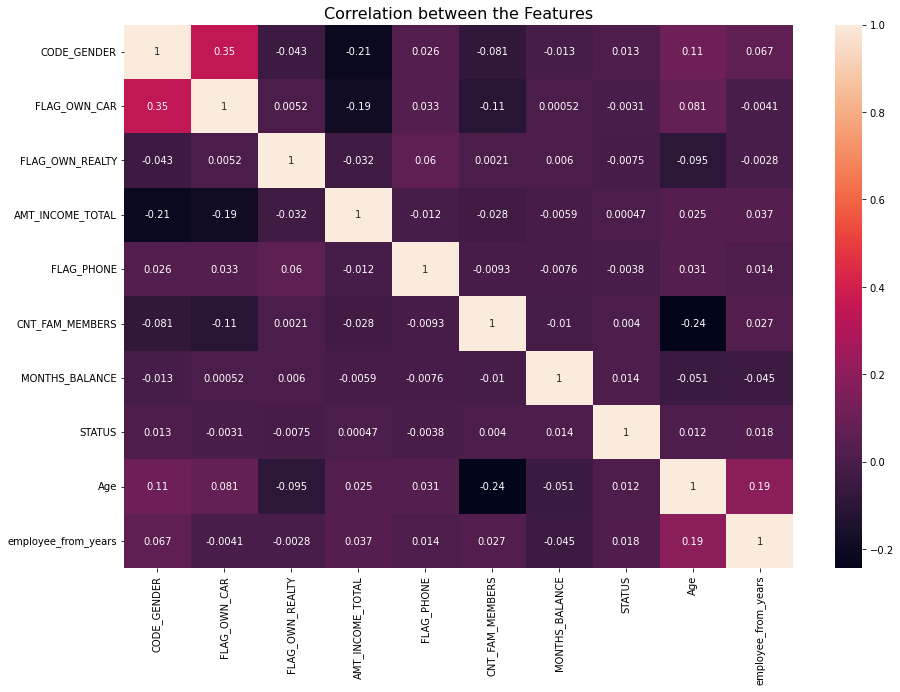

In [283]:
plt.figure(figsize = (15,10))
sns.heatmap(final_df.corr(), annot = True )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [284]:
# one hot encoding
def one_hot_encode(df, columns):
    for col in columns:
        one_hot = pd.get_dummies(df[col], drop_first=True)
        df = pd.concat([df, one_hot], axis=1)
        df = df.drop([col], axis=1)
    return df

categories=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
final_df = one_hot_encode(final_df,categories)
final_df.head(5)


CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  AMT_INCOME_TOTAL  FLAG_PHONE  \
31            0             0                0               112           0   
32            0             0                0               112           0   
33            0             0                0               112           0   
34            0             0                0               112           0   
35            0             0                0               112           0   

    CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  Age  employee_from_years  ...  \
31              2.0               0       1   58                    3  ...   
32              2.0              -1       1   58                    3  ...   
33              2.0              -2       1   58                    3  ...   
34              2.0              -3       1   58                    3  ...   
35              2.0              -4       1   58                    3  ...   

    Laborers  Low-skill Laborers  Managers  Medicine staff  \
31         0                   0         0               0   
32         0                   0         0               0   
33         0                   0         0               0   
34         0                   0         0               0   
35         0                   0         0               0   

    Private service staff  Realty agents  Sales staff  Secretaries  \
31                      0              0            0            0   
32                      0              0            0            0   
33                      0              0            0            0   
34                      0              0            0            0   
35                      0              0            0            0   

    Security staff  Waiters/barmen staff  
31               1                     0  
32               1                     0  
33               1                     0  
34               1                     0  
35               1                     0  

[5 rows x 43 columns]

In [285]:
# train test_split

X = final_df.drop(columns=('STATUS'),axis=1)
y = final_df.STATUS
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (430133, 42)
X_test : (107534, 42)
y_train : (430133,)
y_test : (107534,)


In [286]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.9285360574519974
0.9291107928655123


In [287]:
X = final_df.drop(columns=('STATUS'),axis=1)
y = final_df.STATUS

In [288]:
# shuffle and split the data
data = list(zip(X.values, y))
np.random.shuffle(data)

split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

X_train = [d[0] for d in train_data]
y_train = [d[1] for d in train_data]
X_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]

In [289]:
X_train = np.array(X_train)
y_train = np.array(y_train)
n = X_train.shape[1]
X_train = X_train.reshape(-1, n)
y_train = y_train.reshape(-1,)

In [290]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.var = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))

        # calculate class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / float(len(y))

        # calculate mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = np.mean(X_c, axis=0)
            self.var[i] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for i, x in enumerate(X):
            posteriors = []

            # calculate posterior probability of each class
            for j, c in enumerate(self.classes):
                prior = np.log(self.class_priors[j])
                posterior = np.sum(np.log(self.gaussian_density(x, self.mean[j], self.var[j])))
                posterior = prior + posterior
                posteriors.append(posterior)

            # assign instance to the class with the highest posterior probability
            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred

    def gaussian_density(self, x, mean, var):
        eps = 1e-4
        coef = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = -(np.power(x - mean, 2) / (2.0 * var + eps))
        return coef * np.exp(exponent)


In [291]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Convert X_train and X_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy scores
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.9290916995440945
0.9278088790522068
